In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from scipy.special import hankel2,factorial
from scipy.integrate import odeint,solve_ivp,quad
from scipy.optimize import fsolve
from pandas import DataFrame
%matplotlib notebook

In [3]:
def Ct(k):
    C=hankel2(1,k)/(hankel2(1,k)+np.complex(0,1)*hankel2(0,k))
    return C

In [4]:
k=np.linspace(0.0000001,1,1000)

In [14]:
def E(n,ll):
    D=np.zeros((n,n),dtype=np.float64)
    dm=np.zeros(n,dtype=np.float64)[:,np.newaxis]
    b=np.zeros(n,dtype=np.float64)
    c=np.array([2/(i+1) for i in range(n)],dtype=np.float64)[:,np.newaxis]
    dm[0]=1/2

    for i in range(n):
        for j in range(n):
            if i==j+1:
                D[i,j]=(1/2)/(i+1)
            if i==j-1:
                D[i,j]=-(1/2)/(i+1)
               
    if ll==1:
        for i in range(1,n):
            b[i-1]=(-1)**(i+1)*factorial(n+i-1)/(factorial(n-i-1)*factorial(i)**2)
        b[n-1]=(-1)**(n+1)
    if ll==0:
        for i in range(1,n+1):
            b[i-1]=(-1)**(i-1)*factorial(n)/(factorial(i)*factorial(n-i))
        
    dTm=np.transpose(dm)


    E=(D+dm*b)#+c*dTm+0.5*c*b) MODIFICAR SEGUN SI SE QUIERE APROXIMAR LA FUNCIÓN DE THEODORSEN O NO
    
    return E,b,c,D

In [15]:
def CC(k,n,a):
    λ=la.solve((E(n,a)[0]*np.complex(0,1)*k)+np.identity(n),E(n,a)[2]*np.complex(0,1*k))
    return (1+0.5*λ[0])/(1+0.5*λ[0]+0.5*E(n,a)[1]@λ)

In [31]:
plot5=np.zeros((len(k)),dtype=complex)
for i in range(len(k)):
    plot5[i]=CC(k[i],12,1)

In [35]:
np.sqrt(np.sum((plot5.real-Ct(k).real)**2+(plot5.imag-Ct(k).imag)**2)/1000)*100

2.4544536905846801

<IPython.core.display.Javascript object>


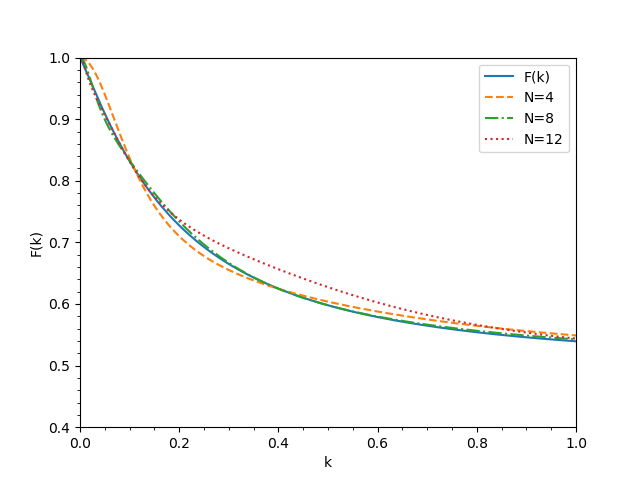

In [33]:
plt.figure()
plt.plot(k,Ct(k).real,label='F(k)')
plt.plot(k,plot3.real,label='N=4',linestyle='--')
plt.plot(k,plot4.real,label='N=8',linestyle='-.')
plt.plot(k,plot5.real,label='N=12',linestyle=':')
plt.xlim(0,1)
plt.ylim(0.4,1)
plt.legend(loc='best')
plt.minorticks_on()
plt.xlabel('k')
plt.ylabel('F(k)')
plt.savefig('realaum',dpi=300)

<IPython.core.display.Javascript object>


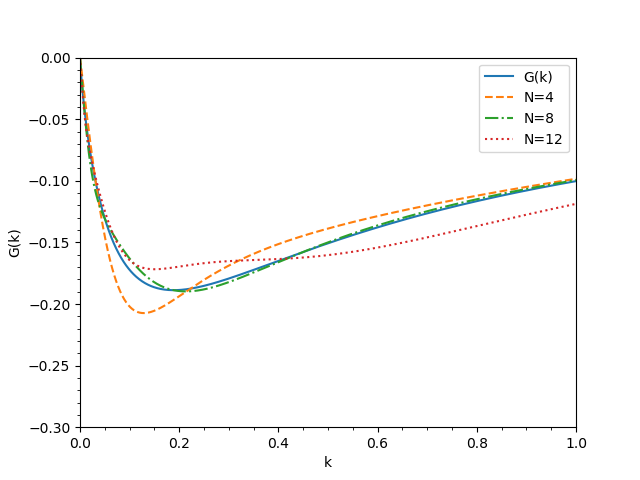

In [34]:
plt.figure()
plt.plot(k,Ct(k).imag,label='G(k)')
plt.plot(k,plot3.imag,label='N=4',linestyle='--')
plt.plot(k,plot4.imag,label='N=8',linestyle='-.')
plt.plot(k,plot5.imag,label='N=12',linestyle=':')
plt.legend(loc='best')
plt.xlim(0,1)
plt.ylim(-0.3,0)
plt.minorticks_on()
plt.xlabel('k')
plt.ylabel('G(k)')
plt.savefig('imagaum',dpi=300)

In [44]:
t=np.linspace(0,50,100000)

In [2657]:
#array([ 0.20279811,  0.03620501]

In [46]:
b=1
ρ=1.225
U0=5
wξ=2
wα=1
kk=kα #iterar, suponer valor primero
ω=kk*U0/b
m=50
mna=m*np.pi*ρ*b**2
d=-1
ξ_0=1
rα=0.5
α_0=2*np.pi/180
U0a=U0/(wα*b)
Kξ=mna*wξ**2
Iα=rα**2*mna*b**2
Sα=quad(mna*(np.poly1d([1,0])-d),-b,b)[0]
Kα=Iα*wα**2

NameError: name 'kα' is not defined

In [40]:
U0a

5.0

In [41]:
ω

5.0

In [42]:
Iα/(np.pi*ρ*b**4)

12.5

In [47]:
ξ=ξ_0*np.exp(np.complex(0,1)*ω*t)
ξ1=np.complex(0,1)*ω*ξ
ξ2=-ω**2*ξ

In [48]:
λcξ=la.solve(E(8,1)[0]*np.complex(0,1)*ω+U0/b*np.identity(8),-ω**2*ξ_0*E(8,1)[2])

In [49]:
λ0ξ=0.5*E(8,1)[1]@(λcξ*np.exp(ω*t*np.complex(0,1)))

In [50]:
L1ξ=np.pi*ρ*b**2*ξ2+2*np.pi*ρ*U0*b*ξ1*Ct(kk)
L2ξ=np.pi*ρ*b**2*ξ2+2*np.pi*ρ*U0*b*(ξ1-pp)

NameError: name 'pp' is not defined

<IPython.core.display.Javascript object>


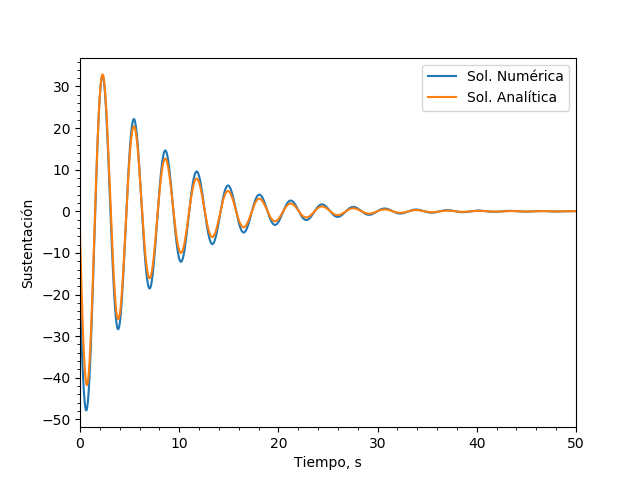

In [139]:
plt.figure()
plt.plot(t,L2ξ.real,label='Sol. Numérica')
plt.plot(t,L1ξ.real,label='Sol. Analítica')
plt.ylabel('Sustentación')
plt.xlabel('Tiempo, s')
plt.xlim(0,50)
#plt.ylim(-50,50)
plt.minorticks_on()
plt.legend(loc='best')



In [133]:
M1ξ=np.pi*ρ*b**2*d*ξ2+2*np.pi*ρ*U0*b*ξ1*Ct(kk)*(0.5*b+d)
M2ξ=np.pi*ρ*b**2*d*ξ2+2*np.pi*ρ*U0*b*(ξ1-pp)*(0.5*b+d)

<IPython.core.display.Javascript object>


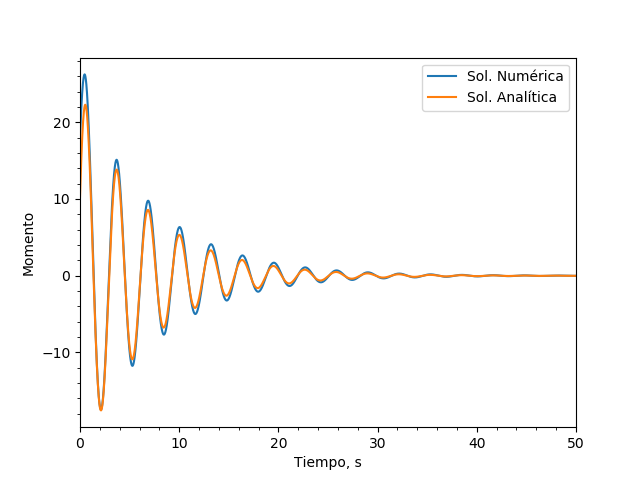

In [134]:
plt.figure()
plt.plot(t,M2ξ.real,label='Sol. Numérica')
plt.plot(t,M1ξ.real,label='Sol. Analítica')
plt.ylabel('Momento')
plt.xlabel('Tiempo, s')
plt.xlim(0,50)
#plt.ylim(-50,50)
plt.minorticks_on()
plt.legend(loc='best')


In [207]:
def soloξ(k):
    kr=k[0]
    ki=k[1]
    def C(kr,ki):
        k=kr+np.complex(0,1)*ki
        C1=hankel2(1,k)/(hankel2(1,k)+np.complex(0,1)*hankel2(0,k))
        return C1.real,C1.imag
    F=C(kr,ki)[0]
    G=C(kr,ki)[1]
    a=b*wξ/U0
    eq1=np.float((a**2*m*ki*kr)/(kr**2+ki**2)-F*kr-G*ki)
    eq2=np.float(m*(a**2*(kr**2-ki**2)/(kr**2+ki**2)-(kr**2+ki**2))-(kr**2+ki**2)-2*(-F*ki+G*kr))
    return eq1,eq2

In [208]:
krξ=fsolve(soloξ,[0.1,0])[0]
kiξ=fsolve(soloξ,[0.1,0])[1]
kξ=krξ+kiξ*np.complex(0,1)
kξ

(0.3992000351196513+0.012324503775706291j)

In [209]:
1-2*np.complex(0,1)*Ct(kξ)/kξ

(0.057275573489943277-3.0937856292286288j)

In [210]:
m*(-1+(wξ*b/(kξ*U0))**2)

(0.057275573489945497-3.0937856292286359j)

In [95]:
ta=t*U0/b

In [96]:
h=ξ_0*np.exp(np.complex(0,1)*kξ*ta)

In [177]:
def matrizsoloξ():
    A=np.zeros((10,10))
    B=np.zeros((10,10))
    C=np.zeros(10)
    
    A[0,0]=1
    A[1,1]=mna+np.pi*ρ*b**2
    A[2:,2:]=E(8,1)[0]
    A[2:,1]=-E(8,1)[2][:,0]
    
    B[0,1]=1
    B[1,0]=-Kξ
    B[1,1]=-2*np.pi*ρ*b*U0
    B[1,2]=2*np.pi*ρ*b*U0
    B[2:,2:]=np.identity(8)*-U0/b
    
    #C[1]=-mna*9.81
    
    
    
    return A,B,C

In [20]:
def f(x,t):
    return la.solve(A, B.dot(x)+C)

In [179]:
A=matrizsoloξ()[0]
B=matrizsoloξ()[1]
C=matrizsoloξ()[2]

In [180]:
sol1=odeint(f,[1,0,0,0,0,0,0,0,0,0],t)

In [171]:
pp=np.zeros(100000)
for i in range(100000):
    pp[i]=0.5*E(8,1)[1]@sol1[i,2:]

KeyboardInterrupt: 

In [131]:
pp

array([  0.00000000e+00,  -9.51964019e-04,  -1.90328312e-03, ...,
        -4.94720728e-05,  -4.95543959e-05,  -4.96366505e-05])

<IPython.core.display.Javascript object>


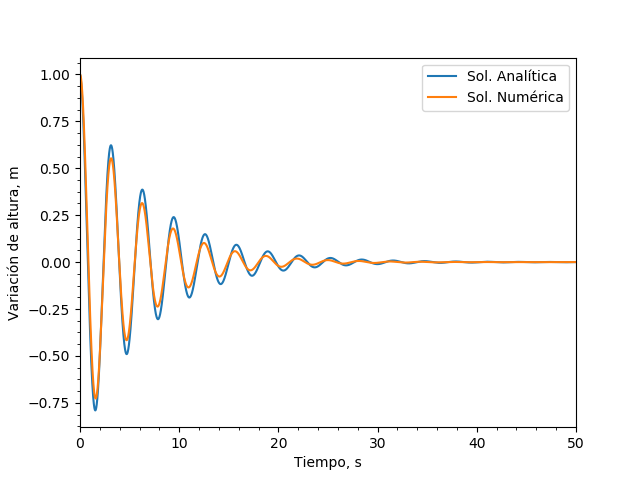

In [671]:
plt.figure()
plt.plot(t,h.real,label='Sol. Analítica')
plt.plot(t,sol1[:,0],label='Sol. Numérica')
plt.plot(-0.1,0.1)
plt.xlim(0,50)
plt.ylabel('Variación de altura, m')
plt.xlabel('Tiempo, s')
plt.minorticks_on()
plt.legend(loc='best')


In [271]:
def soloα(k):
    kr=k[0]
    ki=k[1]
    def C(kr,ki):
        k=kr+np.complex(0,1)*ki
        C1=hankel2(1,k)/(hankel2(1,k)+np.complex(0,1)*hankel2(0,k))
        return C1.real,C1.imag
    F=C(kr,ki)[0]
    G=C(kr,ki)[1]
    #eq1=np.float((m/rα**2)*((1/U0a**2)*(kr**2-ki**2)/(kr**2+ki**2)**2-1)-9/8+3/2*((-G*kr+kr+F*ki)/(kr**2+ki**2))+(F*kr**2-F*ki**2-2*ki*kr*G)/((kr**2+ki**2)**2))
    #eq2=np.float((m/rα**2)*((1/U0a**2)*((-2*ki*kr)/(kr**2+ki**2)**2))+3/2*(F*kr+G*ki-ki)/(kr**2+ki**2)+(-2*F*ki*kr+G*kr**2-G*ki**2)/(kr**2+ki**2)**2)
    eq1=np.float((m*(rα**2))*((1/U0a**2)*((kr**2-ki**2)/(kr**2+ki**2)**2)-1)-(9/8)+(3/2)*((-G*kr+ki+F*ki)/(kr**2+ki**2))+((F*kr**2-F*ki**2+2*ki*kr*G)/(kr**2+ki**2)**2))
    eq2=np.float((m*(rα**2))*((1/U0a**2)*(-2*ki*kr)/(kr**2+ki**2)**2)+(3/2)*((F*kr+G*ki+kr)/(kr**2+ki**2))+((G*kr**2-2*F*ki*kr-G*ki**2)/(kr**2+ki**2)**2))
    return eq1,eq2

In [272]:
krα=fsolve(soloα,[0.3,0])[0]
kiα=fsolve(soloα,[0.3,0])[1]
kα=krα+kiα*np.complex(0,1)
kα

(0.28983832304048812+0.066630847716918601j)

In [273]:
9/8-(3*np.complex(0,1)/2)*(Ct(kα)+1)/kα-Ct(kα)/kα**2

(-7.4143663173006962-2.46874086700101j)

In [274]:
m*rα**2*((1/(kα*U0a))**2-1)

(-7.4143663173006606-2.4687408670009492j)

In [275]:
ta=t*U0/b

In [276]:
α_0=2*np.pi/180

In [293]:
αa=α_0*np.exp(np.complex(0,1)*kα*ta)

<IPython.core.display.Javascript object>


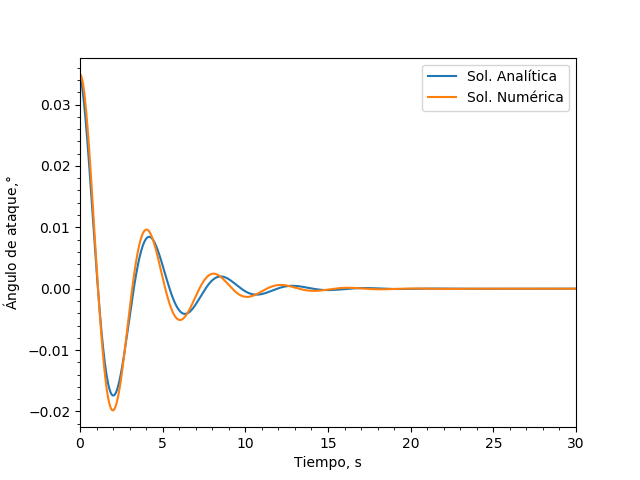

In [297]:
plt.figure()
plt.plot(t,αa.real,label='Sol. Analítica')
plt.plot(t,solα[:,0],label='Sol. Numérica')
#plt.ylim(-2,2)
plt.xlim(0,30)
plt.ylabel('Ángulo de ataque,'r'$\degree$')
plt.xlabel('Tiempo, s')
plt.minorticks_on()
plt.legend(loc='best')


In [281]:
α=α_0*np.exp(np.complex(0,1)*ω*t)
α1=np.complex(0,1)*ω*α
α2=-ω**2*α

In [306]:
a=d/b-1
L1α=np.pi*ρ*b**2*(U0*α1-b*a*α2)+2*np.pi*ρ*U0*b*Ct(kα)*(U0*α+b*(0.5-a)*α1)

In [283]:
L1α[0]

(3.9617670856461906+2.70203728951468j)

<IPython.core.display.Javascript object>


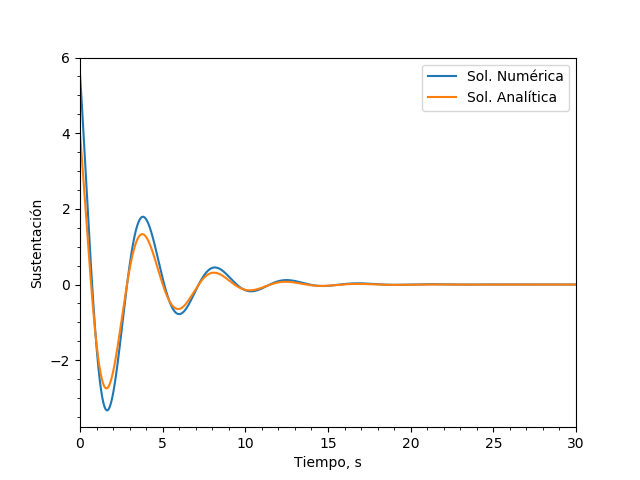

In [310]:
plt.figure()
plt.plot(t,L2α.real,label='Sol. Numérica')
plt.plot(t,L1α.real,label='Sol. Analítica')
plt.ylabel('Sustentación')
plt.xlabel('Tiempo, s')
plt.xlim(0,30)
#plt.ylim(-50,50)
plt.minorticks_on()
plt.legend(loc='best')


In [285]:
M1α=-np.pi*ρ*b**2*U0*α1*(0.5*b-d)-np.pi*ρ*(1/8*b**2*d**2)*α2+2*np.pi*ρ*U0*b*Ct(kk)*(U0*α+(0.5*b-d)*α1)*(d+0.5*b)

<IPython.core.display.Javascript object>


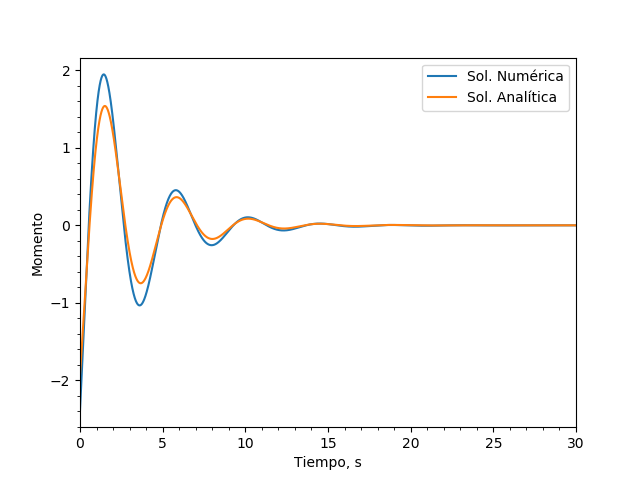

In [309]:
plt.figure()
plt.plot(t,M2α.real,label='Sol. Numérica')
plt.plot(t,M1α.real,label='Sol. Analítica')
plt.ylabel('Momento')
plt.xlabel('Tiempo, s')
plt.xlim(0,30)
#plt.ylim(-50,50)
plt.minorticks_on()
plt.legend(loc='best')


In [90]:
λcα=la.solve(E(8,1)[0]*np.complex(0,1)*ω+U0/b*np.identity(8),E(8,1)[2]*(U0*np.complex(0,1)*ω*α_0-(0.5*b-d)*ω**2*α_0))

In [91]:
λ0α=0.5*E(8,1)[1]@(λcα*np.exp(ω*t*np.complex(0,1)))

In [302]:
L2α=np.pi*ρ*b**2*(U0*α1-d*α2)+2*np.pi*ρ*b*U0**2*(α+(0.5*b-d)*α1/U0-ppo/U0)

In [303]:
M2α=np.pi*ρ*b**2*(-U0*α1*(0.5*b-d)-(1/8*b**2+d**2)*α2)+2*np.pi*ρ*U0**2*b*(α+(0.5*b-d)*α1/U0-ppo/U0)*(d+0.5*b)

In [288]:
def matrizsoloα():
    A=np.zeros((10,10))
    B=np.zeros((10,10))
    C=np.zeros(10)
    
    
    A[0,0]=1
    
    #A[1,1]=Iα+np.pi*ρ*(b)**2*(1/8*(b)**2+(d)**2)
    A[1,1]=(1+1/(m*rα**2)*(1/8+d**2))*wα**2#/(2*np.pi)**2
    
    #A[2:,2:]=E(8,1)[0]
    #A[2:,1]=E(8,1)[2][:,0]*(0.5*b-d)
    A[2:,1]=-E(8,1)[2][:,0]*(0.5-d)*wα**2#/(2*np.pi)**2
    A[2:,2:]=E(8,1)[0]*U0*wα/(b)#*2*np.pi)
    
    B[0,1]=1
    #B[1,0]=-Kα+2*np.pi*ρ*b*U0**2*(0.5*b+d)
    B[1,0]=-wα**2+2*U0**2*(0.5+d)/(m*b**2*rα**2)
    
    #B[1,1]=-np.pi*ρ*b**2*U0*(0.5*b-d)+2*np.pi*ρ*b*U0*(0.5*b+d)*(0.5*b-d)
    #B[1,1]=U0*b*d*ρ*np.pi*(b-2*d)
    B[1,1]=(U0*d*(1-2*d)/(m*b*rα**2))*wα**2#/(2*np.pi)**2
    
    #B[1,2]=-2*np.pi*ρ*b*U0*(0.5*b+d)
    B[1,2]=-2*U0**2*(0.5+d)/(m*b*rα**2)
    
    #B[2:,1]=E(8,1)[2][:,0]*U0
    #B[2:,2:]=np.identity(8)*-U0/b
    
    B[2:,1]=(E(8,1)[2][:,0]*U0/b)*wα**2#/(2*np.pi)**2
    B[2:,2:]=np.identity(8)*-U0**2/b**2
    
    #C[1]=Kα*α_0#+9.81*Sα
    
    
    
    return A,B,C

In [226]:
def ss2():
    A=np.zeros((10,10))
    B=np.zeros((10,10))
    C=np.zeros(10)
    
    
    A[0,0]=1
    A[1,1]=wα**2*(rα**2+(1/m)*(1/8+d**2))   
    A[2:,1]=-E(8,1)[2][:,0]*(0.5-d)*wα**2
    A[2:,2:]=E(8,1)[0]*U0a/(2*np.pi)*wα
    
    B[0,1]=1
    
    B[1,0]=(U0a**2/m+2*U0a**2*d/m-rα**2)
    
    B[1,1]=U0a*d*(1-2*d)*wα/m
    
 
    B[1,2]=-2*U0a**2*(0.5+d)/m

    
    B[2:,1]=(E(8,1)[2][:,0])*U0a*wα
    B[2:,2:]=-np.identity(8)*U0a**2
    
    
    #C[1]=rα**2*α_0/wα**2
    
    
    
    return A,B,C

In [295]:
solα=odeint(f,[α_0,0,0,0,0,0,0,0,0,0],t)

In [298]:
solα

array([[  3.49065850e-02,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.49065730e-02,  -4.80297054e-05,  -1.27974170e-05, ...,
         -4.82019033e-06,  -3.22709959e-06,  -1.61723058e-06],
       [  3.49065370e-02,  -9.60446721e-05,  -2.55670025e-05, ...,
         -9.67803407e-06,  -6.50236114e-06,  -3.27229410e-06],
       ..., 
       [ -3.75095075e-08,   6.86463820e-09,  -5.18797246e-08, ...,
         -5.76308227e-09,  -4.93825021e-09,  -4.32955097e-09],
       [ -3.75069052e-08,   6.86422735e-09,  -5.18762442e-08, ...,
         -5.76269538e-09,  -4.93791871e-09,  -4.32926024e-09],
       [ -3.75043029e-08,   6.86381650e-09,  -5.18727638e-08, ...,
         -5.76230850e-09,  -4.93758721e-09,  -4.32896951e-09]])

In [299]:
ppo=np.zeros(100000)
for i in range(100000):
    ppo[i]=0.5*E(8,1)[1]@solα[i,2:]

In [300]:
ppo

array([  0.00000000e+00,  -7.20732818e-06,  -1.44197672e-05, ...,
        -4.82851734e-07,  -4.82819528e-07,  -4.82787323e-07])

In [301]:
λ0α.real

array([  3.71396960e-02,   3.70893685e-02,   3.70390372e-02, ...,
        -1.41107672e-09,  -1.40800573e-09,  -1.40493499e-09])

In [120]:
0.5*E(8,1)[1]@solα[i,2:]

-2.7960802706920515e-05